In [67]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
A=[[-1,4],[2,-2]]

In [4]:
lambdas, V = np.linalg.eig(A)

In [5]:
lambdas #EIGENVALUES

array([ 1.37228132, -4.37228132])

In [6]:
v= V[:,0]
v

array([0.86011126, 0.51010647])

In [7]:
lambda_0=lambdas[0]

In [8]:
Av=np.dot(A,v)

In [9]:
Av,lambda_0*v  #BOTH ARE THE SAME SINCE Av=lambda*v

(array([1.18031462, 0.70000958]), array([1.18031462, 0.70000958]))

In [10]:
np.linalg.det(A)

-6.0

In [11]:
lambdas[0]*lambdas[1] #DETERMINANT IS EQUAL TO THE MULTIPLICATION OF ALL EIGENVECTORS

-6.0

Now, in PyTorch

In [12]:
A_p=torch.tensor([[-1,4],[2,-2.]])
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [13]:
eigens = torch.eig(A_p, eigenvectors=True)
eigens

/var/folders/t6/nkv95bj97gv9j73w9bfk2p0r0000gn/T/ipykernel_5908/1104588676.py:1: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:3427.)
  eigens = torch.eig(A_p, eigenvectors=True)


torch.return_types.eig(
eigenvalues=tensor([[ 1.3723,  0.0000],
        [-4.3723,  0.0000]]),
eigenvectors=tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]]))

In [14]:
torch.det(A_p)

tensor(-6.)

Eigendecomposition

In [15]:
A = np.array([[4,2],[-5,-3]])
lambdas,V = np.linalg.eig(A)
Vinv = np.linalg.inv(V)
Lambda=np.diag(lambdas)


In [17]:
np.dot(V,np.dot(Lambda,Vinv)),A  #THIS WAS THE ORIGINAL THEORY

(array([[ 4.,  2.],
        [-5., -3.]]),
 array([[ 4,  2],
        [-5, -3]]))

# Singular Value Decomposition

A=UDV^T

- U is an orthogonal m*m matrix whose columns are the left-singular vectors of A.
- V is an orthogonal n*n matrix whose columns are the right-singular vectors of A.
- D is an orthogonal m*n matrix whose elements along its diagonal are the singular values of A.

In [21]:
A = np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [39]:
U,d,VT = np.linalg.svd(A) #V is already transposed

In [23]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [24]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [25]:
d

array([8.66918448, 4.10429538])

In [27]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [40]:
D= np.concatenate((np.diag(d),[[0,0]]),axis=0)

In [29]:
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

Proof

U=eigenvectors of A*AT

V=eigenvectors of AT*A

D=sqrt(eigenvals of A* AT) = sqrt(eigenvals of AT*A)

In [41]:
lambdasU, vectorsU = np.linalg.eig(np.dot(A,A.T))

In [44]:
vectorsU, U

(array([[-0.12708324,  0.87125411, -0.47409506],
        [-0.00164602,  0.47778451,  0.87847553],
        [-0.99189069, -0.11241989,  0.0592843 ]]),
 array([[ 0.12708324,  0.47409506,  0.87125411],
        [ 0.00164602, -0.87847553,  0.47778451],
        [ 0.99189069, -0.0592843 , -0.11241989]]))

In [45]:
lambdasV, vectorsV = np.linalg.eig(np.dot(A.T,A))

In [47]:
vectorsV,VT

(array([[-0.82984845, -0.55798885],
        [ 0.55798885, -0.82984845]]),
 array([[ 0.55798885,  0.82984845],
        [-0.82984845,  0.55798885]]))

In [49]:
lambdasD, vectorsD = np.linalg.eig(np.dot(A.T,A))

In [56]:
vectorsD,lambdasD

(array([[-0.82984845, -0.55798885],
        [ 0.55798885, -0.82984845]]),
 array([16.84524053, 75.15475947]))

In [54]:
vectorsD_sqrt = np.sqrt(vectorsD)

/var/folders/t6/nkv95bj97gv9j73w9bfk2p0r0000gn/T/ipykernel_5908/3283352343.py:1: RuntimeWarning: invalid value encountered in sqrt
  vectorsD_sqrt = np.sqrt(vectorsD)


In [55]:
vectorsD_sqrt


array([[       nan,        nan],
       [0.74698651,        nan]])

In [52]:
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

Example

In [57]:
from PIL import Image

In [61]:
!wget "https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg"

--2022-10-29 16:22:45--  https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419564 (410K) [image/jpeg]
Saving to: ‘oboe-with-book.jpg’

oboe-with-book.jpg  100%[===================>] 409,73K  --.-KB/s    in 0,09s   

2022-10-29 16:22:45 (4,30 MB/s) - ‘oboe-with-book.jpg’ saved [419564/419564]



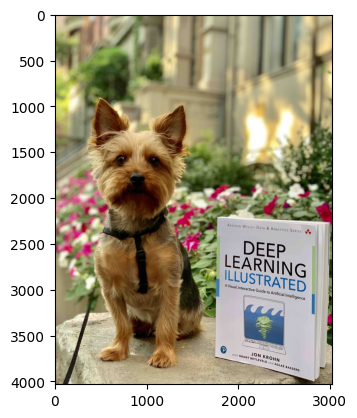

In [68]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

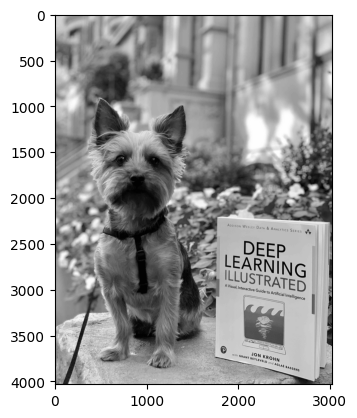

In [69]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

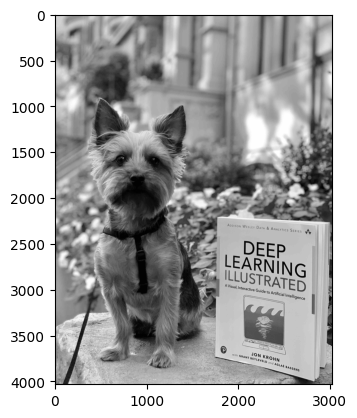

In [71]:
#convert data into numpy matrix
imgmat = np.array(list(imggray.getdata(band=0)),float)
imgmat.shape = (imggray.size[1],imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat , cmap='gray')

In [72]:
#calculate the SVD
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag(1) so to are singular values, by convention, arranged in descending order in D (or, in this code, diag(o)). Thus, the first left-singular vector of U and first right-singular vector of may represent the most prominent feature of the
image:

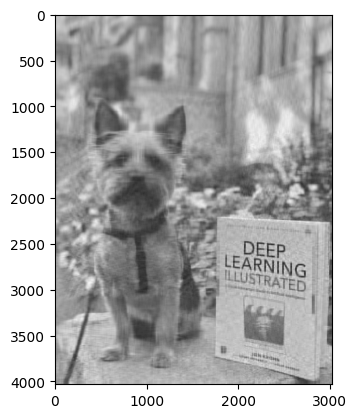

In [79]:
n=50
reconstimg = np.matrix(U[:,:n])*np.diag(sigma[:n])*np.matrix(V[:n,:])
_ = plt.imshow(reconstimg, cmap='gray')

In [80]:
full_representation = 4032*3024
full_representation

12192768

In [82]:
svd64_rep=64*4032 + 64 + 64*3024
svd64_rep

451648

In [83]:
svd64_rep/full_representation

0.037042286050222556

# Pseudoinverse of Matrices

In [84]:
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [87]:
U,d,VT = np.linalg.svd(A)
D=np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [88]:
Dinv = np.linalg.inv(D)

In [90]:
Dplus = np.concatenate((Dinv,np.array([[0,0]]).T), axis=1)

In [91]:
np.dot(VT.T,np.dot(Dplus,U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

But you can do this in a single line...

In [92]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Regression using Pinv

In [93]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [95]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

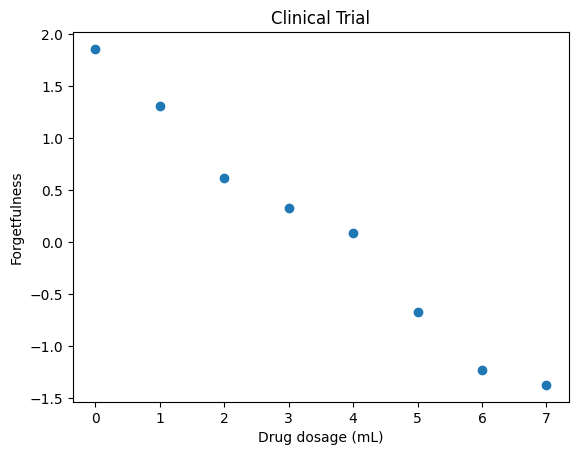

In [96]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1,y)

In [97]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [98]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T),axis=1)

In [99]:
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

Calculate the weights using --> w = Xplus*y

In [100]:
w=np.dot(np.linalg.pinv(X),y)

In [101]:
w

matrix([[ 1.76      , -0.46928571]])

So, the eqn is:

y=1.76 - 0.469*x1

In [102]:
b= np.asarray(w).reshape(-1)[0]
b

In [105]:
m=np.asarray(w).reshape(-1)[1]
m

-0.4692857142857139

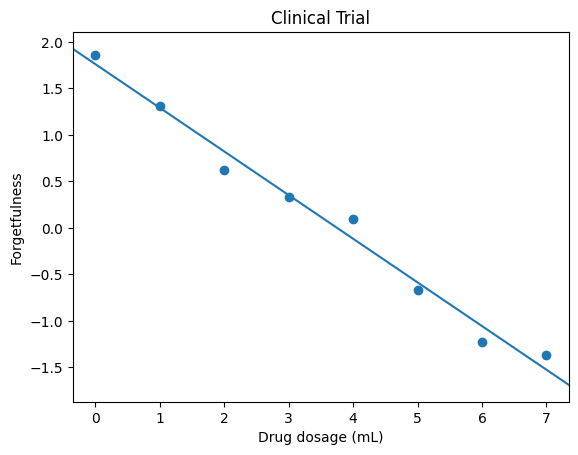

In [108]:
fig, ax = plt.subplots()
plt.title (title)
plt.xlabel (xlabel)
plt.ylabel (ylabel)
ax. scatter (x1, y)
x_min, x_max = ax.get_xlim()
y_min, y_max = m*x_min + b, m*x_max + b
ax.set_xlim([x_min, x_max])
_ = ax.plot ([x_min, x_max], [y_min, y_max])

Trace Operator

Denoted as Tr(A). Simply the sum of the diagonal elements of a matrix

- Tr(A) = Tr(AT)

In [112]:
A=np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [113]:
np.trace(A)

5

# Principle Component Analysis (PCA)

- Unsupervised
- Like eigendecomposition and SVD, enables lossy compression

In [115]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [116]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [117]:
from sklearn.decomposition import PCA

In [118]:
pca = PCA(n_components=2)
X= pca.fit_transform(iris.data)
X.shape

(150, 2)

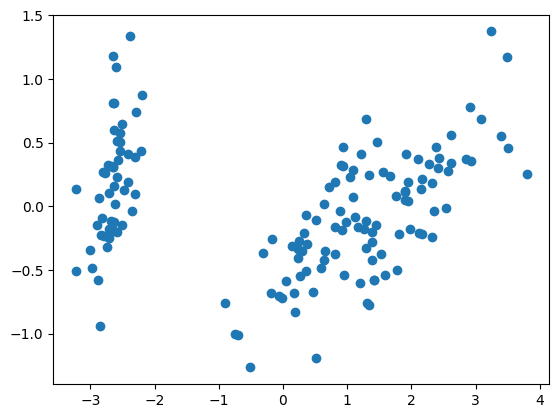

In [119]:
_ = plt.scatter(X[:,0],X[:,1])

In [121]:
iris.target.shape

(150,)

In [123]:
unique_elements, counts_elements = np.unique(iris.target , return_counts=True)
np.asarray((unique_elements,counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]])

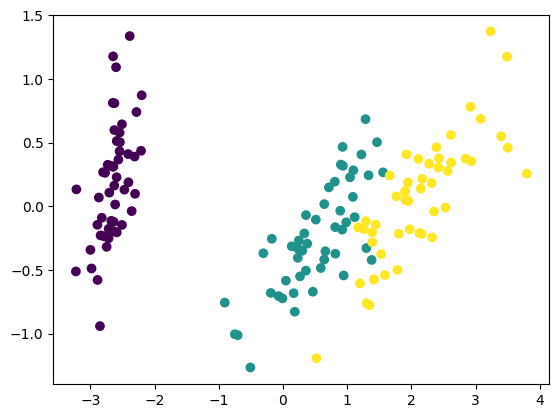

In [125]:
_ = plt.scatter(X[:,0],X[:,1], c=iris.target)

Differentiation

A.K.A.

Automatic Differentiation

Autodiff

Autograd

Computational diff

Reverse mode diff

Algorithmic diff



In [1]:
import torch

In [10]:
x=torch.tensor(5.0)
x.requires_grad_()
y=x**2
y.backward()

tensor(5., requires_grad=True)

In [15]:
x.grad

Same w/ tensorflow

In [19]:
import tensorflow as tf

2022-11-10 18:14:03.099035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
x=tf.Variable(5.0)

2022-11-10 18:14:34.944504: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
with tf.GradientTape() as t:
    t.watch(x) #track forward pass
    y=x**2

In [22]:
t.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>